# EDA: House Prices with Area, Bathrooms, Stories, Air Conditioning:
The following Jupyter notebook would analyze the housing data. After initial EDA performed by marquise; The correlation matrix have shown that area. bathrooms, airconditioning, and stories have a correlation score with price higher than 0.4: <br>

- Determine the population distribution, sample data distribution, and sampling dsitributions, based on their specific features.
- Construct confidence intervals for each of them based on their sampling statistic estimator (continous: Mean, discrete: porportion).
- Select data based between ranges, or discrete values, and plot the boxplots to see the influence of the feature in the data

The objectives of these are to identify the ranges for:
- Average areas in the data, and confidence interval of it.
- Average bathrooms in the data, and confidence interval of it.
- Average stories in the data, and confidence interval of it.
- Air conditioning sampling distribution, and confidence interval of it.

And also, how the effect of one has impacts on the total price using graphical tools. _A future EDA can be used to perform statistical tests_

# Step 1: Define Distributions.
BEFORE even attempting to perform inference or descriptive statistics, the first step to do is to define the different distributions, and its parameters; to understand how its gonna be analyzed. <br>

## Population distribution:
Refers to the total number of individuals or items that we are gonna perform descriptive and inference statistics. In our case, it would be the entirety of the housing data file. Previous analyzes have shown there is a total of 545 houses. 

In our case; we will assume that our data is a subset of the true population of houses from city A. Meaning we don't truly know the entire population distribution; yet we know they come from a city. Since we are gonna analyze different specific data points based on continous and binary; we can have some possible candidates as the following (KEY: They might differ, specially for continous):

### Binomial Distribution

**Formula**:
$$
P(X = k) = \binom{n}{k} \cdot p^k \cdot (1 - p)^{n - k}
$$

- \( n \) is the number of trials.
- \( k \) is the number of successes.
- \( p \) is the probability of success in each trial.

**Real-Life Example**:  
For instance, we selected the data based on a binary features (yes or no), in this case; our n = 1, and we use $p = \frac{yes-or-no-counts}{Total counts}$

### Exponential Distribution

**Formula**:
$$
f(x; \lambda) = \lambda e^{- \lambda x}, \quad \text{for } x \geq 0
$$
- \( $\lambda$ = $\frac{1}{\theta}$ \) is the rate parameter.

**Real-Life Example**:  
For instance, we selected the data based on a continous features, and we realized there is a certain skew behind it. Impyling that based on a specific area; the house price changes at a certain rate.

## Sample data distribution:
This refers to the distribution that explains the probability of a sub-set of the population. This is used to use sample statistics, which can give bigger insights to the real True population distribution.

In our case; we are using n = 545. We are calculating the sample mean for continuous variables $\bar{x}$, and for binary variables we are calculating the sample proportion $\hat{p}$.

## Sampling distribution

Is the probability distribution of a given statistic (the sampling mean or sampling proportion) based on all possible samples of a specific size, drawn from a population.

_CLT states that the sampling distribution of the sample mean would be approximately normal, as long as the sample size is high enough (n > 30). We are gonna use bootstrapping with the sample distribution we have to simulate the sampling distribution graphs_

Finally, our confidence interval would be for proportion discrete variables:
$$\hat{p} \pm z * \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

For continous variables, our confidence interval is based on sample statistics, so we must use the t-distribution instead.
$$\bar{x} \pm t * \sqrt{\frac{s}{\sqrt{n}}}$$



Step 1: Import necessary modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns

Step 2: Load Housing Dataset - Load the housing price dataset, inspect the first few rows and check for missing values.

In [3]:
#Set the data path to the data folder
data_path = os.path.join(os.getcwd(), os.pardir, "data", "housing.csv")

# Load housing dataset
df_data = pd.read_csv(data_path)
df_data.head()
print(df_data.shape)

(545, 13)


Step 3: Make binary yes/no features to continous 1s and zeros

In [4]:
### NOW LETS do the following, lets replace the binary variables to numbers 
# single binomial bernoulli counts
df_data["mainroad"] = df_data["mainroad"].replace({"yes": 1, "no": 0})
df_data["guestroom"] = df_data["guestroom"].replace({"yes": 1, "no": 0})
df_data["basement"] = df_data["basement"].replace({"yes": 1, "no": 0})
df_data["hotwaterheating"] = df_data["hotwaterheating"].replace({"yes": 1, "no": 0})
df_data["airconditioning"] = df_data["airconditioning"].replace({"yes": 1, "no": 0})
df_data["parking"] = df_data["parking"].replace({"yes": 1, "no": 0})
df_data["prefarea"] = df_data["prefarea"].replace({"yes": 1, "no": 0})
df_data["furnishingstatus"] = df_data["furnishingstatus"].replace({"furnished": 1, "semi-furnished": 1, "unfurnished": 0})

C:\Users\ajedr\AppData\Local\Temp\ipykernel_18208\2117601333.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data["mainroad"] = df_data["mainroad"].replace({"yes": 1, "no": 0})
C:\Users\ajedr\AppData\Local\Temp\ipykernel_18208\2117601333.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data["guestroom"] = df_data["guestroom"].replace({"yes": 1, "no": 0})
C:\Users\ajedr\AppData\Local\Temp\ipykernel_18208\2117601333.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future vers

Step 4: Select the data that would be desired to analyze

In [7]:
#Select the subset of data to analyze
df_high_corr_features = df_data[["area", "bathrooms", "stories", "airconditioning"]]

#Obtain statistics for all these high correlated features
print(df_high_corr_features.describe())

               area   bathrooms     stories  airconditioning
count    545.000000  545.000000  545.000000       545.000000
mean    5150.541284    1.286239    1.805505         0.315596
std     2170.141023    0.502470    0.867492         0.465180
min     1650.000000    1.000000    1.000000         0.000000
25%     3600.000000    1.000000    1.000000         0.000000
50%     4600.000000    1.000000    2.000000         0.000000
75%     6360.000000    2.000000    2.000000         1.000000
max    16200.000000    4.000000    4.000000         1.000000


### Air conditioning analyses:

Step 1. Lets start with the first one, the binary discrete air conditioning dataset. lets obtain the sample data distribution.

The sample proportion of houses with AC is: 0.3155963302752294


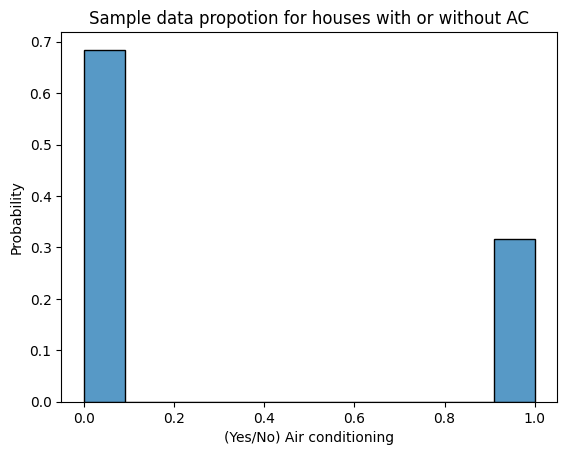

In [17]:
#Obtain the ac data
ac_data = df_high_corr_features["airconditioning"].to_numpy()

fig1, ax1 = plt.subplots()
sns.histplot(ax = ax1, data=ac_data,\
    stat="probability")
ax1.set_xlabel("(Yes/No) Air conditioning")
ax1.set_title("Sample data propotion for houses with or without AC")

# Calculate the propotion of samples that has AC
sample_prop_ac = np.mean(ac_data)
print(f"The sample proportion of houses with AC is: {sample_prop_ac}")

Step 2: Using bootstrapping with the sample data you have, simulate the bootstrapped sampling distribution of proportions.

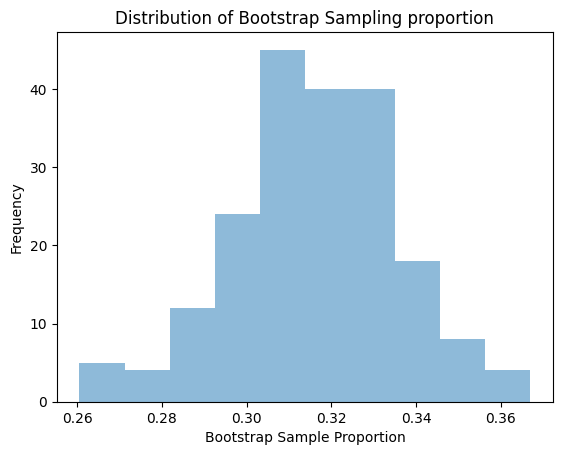

In [20]:
#Number of bootstrap iterations
n_bootstrap = 200

#Perform bootstrap process
bootstrapped_props = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(ac_data, size = len(ac_data), replace=True)

    #Obtain the sampling distributions of sample means from bootstrap
    bootstrapped_props.append(np.mean(bootstrap_sample))

#Plot the histogram of bootstrapped means
plt.hist(bootstrapped_props, bins=10, alpha = 0.5)
plt.xlabel("Bootstrap Sample Proportion")
plt.ylabel("Frequency")
plt.title("Distribution of Bootstrap Sampling proportion")

plt.show()

Step 3: To confirm that indeed, this is the average proportion of houses with AC, we would calculate the confidence interval at 95%

$$\hat{p} \pm z * \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

In [21]:
# Get the z-critical value*
z_critical = stats.norm.ppf(q = 0.975)  
print("z-critical value:")           
print(z_critical)                        

# Calculate the margin of error for proportions
margin_of_error = z_critical * np.sqrt((sample_prop_ac * (1 - sample_prop_ac))/len(ac_data))

#Calculate the proportion interval
confidence_interval = (sample_prop_ac - margin_of_error,
                       sample_prop_ac + margin_of_error)  

print(f"Confidence interval:{confidence_interval}")

z-critical value:
1.959963984540054
Confidence interval:
(0.2765777038385608, 0.35461495671189797)


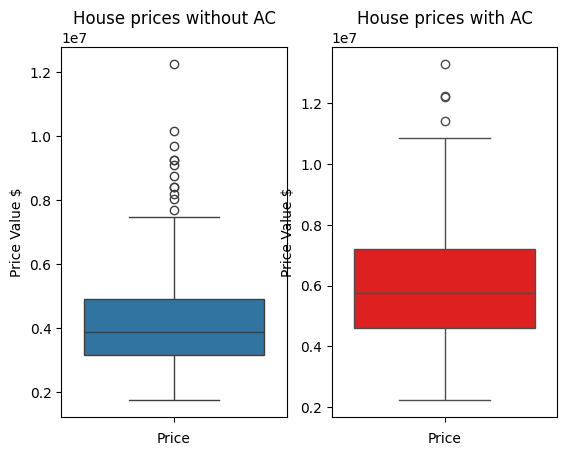

In [24]:
df_houses_ac = df_data[["price", "airconditioning"]]

#Lets get metrics now for new and not new
df_houses_no_ac = df_houses_ac[df_data["airconditioning"] == 0]
df_houses_with_ac = df_houses_ac[df_data["airconditioning"] == 1]

plt.figure()
plt.subplot(1,2,1)
sns.boxplot(df_houses_no_ac["price"])
plt.title('House prices without AC')
plt.xlabel('Price')
plt.ylabel('Price Value $')
plt.subplot(1,2,2)
sns.boxplot(df_houses_with_ac["price"], color="r")
plt.title('House prices with AC')
plt.xlabel('Price')
plt.ylabel('Price Value $')
plt.show()

### Area analyses:

Step 1. Lets obtain the sample distribution of area of houses.

The sample area data mean and stdev is 5150.54128440367, 2168.149153321305


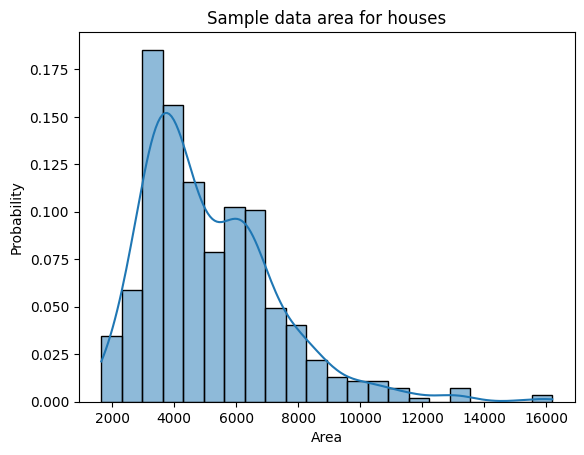

In [26]:
#Obtain the area data
area_data = df_high_corr_features["area"].to_numpy()

fig1, ax1 = plt.subplots()
sns.histplot(ax = ax1, data=area_data, kde=True,\
    stat="probability")
ax1.set_xlabel("Area")
ax1.set_title("Sample data area for houses")

# Calculate the area mean and standard deviation
sample_area_data = np.mean(area_data)
sample_std_data = np.std(area_data)
print(f"The sample area data mean and stdev is {sample_area_data}, {sample_std_data}")

Interesting! The sample data distribution of house areas is skewed to the right. This can be modelled with an exponential distribution for continous variables. Nevertherless, we would like now to see how the sample mean behaves.

Step 2: Using bootstrapping with the sample data you have, simulate the bootstrapped sampling distribution of area means

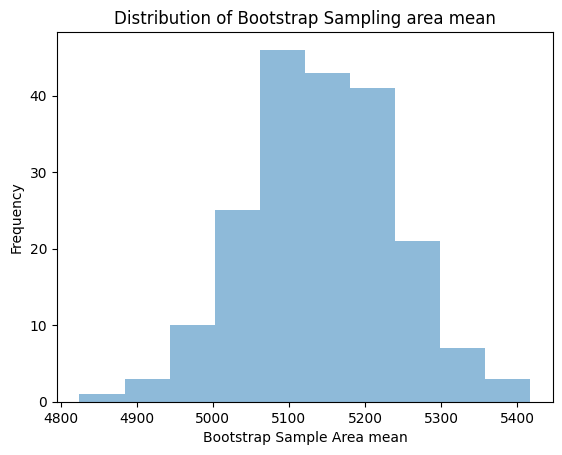

In [27]:
#Number of bootstrap iterations
n_bootstrap = 200

#Perform bootstrap process
bootstrapped_means = []

for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(area_data, size = len(area_data), replace=True)

    #Obtain the sampling distributions of sample means from bootstrap
    bootstrapped_means.append(np.mean(bootstrap_sample))

#Plot the histogram of bootstrapped means
plt.hist(bootstrapped_means, bins=10, alpha = 0.5)
plt.xlabel("Bootstrap Sample Area mean")
plt.ylabel("Frequency")
plt.title("Distribution of Bootstrap Sampling area mean")

plt.show()

Step 3: Determine the 95% confidence interval of area using the t statistic

$$\bar{x} \pm t * \sqrt{\frac{s}{\sqrt{n}}}$$

In [28]:
import math

# Get the t-critical value*
t_critical = stats.t.ppf(q = 0.975, df = len(area_data)-1)  
print("t-critical value:")           
print(t_critical)                        

#Calculate the sample std
sample_stdev = area_data.std(ddof=1)    # Get the sample standard deviation
sigma = sample_stdev/math.sqrt(len(area_data))  # Standard deviation estimate
sample_mean = area_data.mean()

margin_of_error = t_critical * sigma
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

t-critical value:
1.9643343306673329
Confidence interval:
(4967.939460006809, 5333.143108800531)


In [32]:
df_houses_area = df_data[["price", "area"]]

# Create DataFrames for each area range
df_area_1 = df_houses_area[df_data["area"] <= 2500]
df_area_2 = df_houses_area[(df_data["area"] > 2500) & (df_data["area"] <= 5000)]
df_area_3 = df_houses_area[(df_data["area"] > 5000) & (df_data["area"] <= 7500)]
df_area_4 = df_houses_area[(df_data["area"] > 7500) & (df_data["area"] <= 10000)]
df_area_5 = df_houses_area[(df_data["area"] > 10000) & (df_data["area"] <= 12500)]
df_area_6 = df_houses_area[(df_data["area"] > 12500) & (df_data["area"] <= 17000)]

# List of DataFrames for each area section
areas_sections = [df_area_1, df_area_2, df_area_3, df_area_4, df_area_5, df_area_6]

# Initialize a list to store mean prices
mean_prices = []

# Calculate mean price for each area section
for i, df in enumerate(areas_sections, start=1):
    mean_price = df['price'].mean()
    mean_prices.append({"Area Range": f"Section {i}", "Mean Price": mean_price})

# Create a DataFrame from the results
df_means = pd.DataFrame(mean_prices)

# Display the resulting DataFrame
print(df_means)


  Area Range    Mean Price
0  Section 1  3.204923e+06
1  Section 2  3.960615e+06
2  Section 3  5.824693e+06
3  Section 4  6.109660e+06
4  Section 5  5.773833e+06
5  Section 6  6.870500e+06


C:\Users\ajedr\AppData\Local\Temp\ipykernel_18208\3981380035.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Area Range', y='price', data=df_data, palette='Set2')


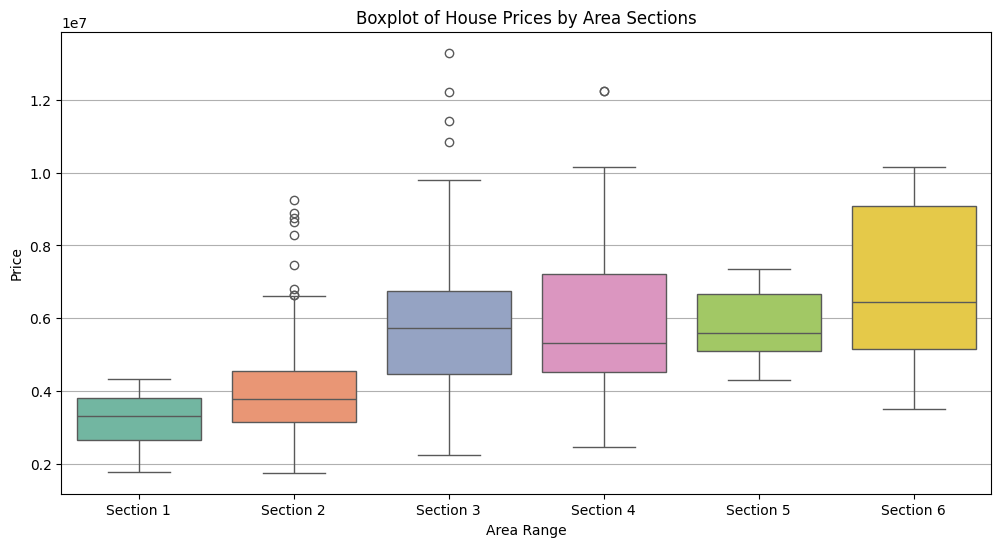

In [31]:
# Create a new column to classify area ranges
df_data['Area Range'] = pd.cut(
    df_data['area'],
    bins=[0, 2500, 5000, 7500, 10000, 12500, 17000],
    labels=['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6'],
    right=True
)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Area Range', y='price', data=df_data, palette='Set2')

# Customize the plot
plt.title('Boxplot of House Prices by Area Sections')
plt.xlabel('Area Range')
plt.ylabel('Price')
plt.grid(axis='y')

# Show the plot
plt.show()

### Conclusions:

Air conditioning:
1. The proportion of houses that contain AC in the dataset is 0.3156
2. Its confidence interval is 95% confidence interval is: (0.2765777038385608, 0.35461495671189797)
3. Graphically, when analyzing the boxplot with or without ACs, its obvious that houses with AC have higher price.